## IMPORT LIBRARIES :

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

## READ THE DATASET :

In [170]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [171]:
## Understanding the data :

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [172]:
df.shape

(15509, 10)

## DATA PREPROCESSING :

In [173]:
## Checking Null Values Percentage :

def fetch_null_count_percent(df):
    Null_Count = df.isnull().sum()
    Null_Count = Null_Count[Null_Count > 0]
    nullv_res = pd.DataFrame({'Feature' : Null_Count.index,'Null_Count':Null_Count.values,'Null_Percent':(Null_Count.values/df.shape[0])*100})
    nullv_res = nullv_res.sort_values("Null_Percent", ascending=False)
    return nullv_res

nv_df = fetch_null_count_percent(df)
nv_df

,Feature,Null_Count,Null_Percent
1,Duration,8269,53.317429
3,Rating,7590,48.939326
4,Votes,7589,48.932878
8,Actor 3,3144,20.272100
7,Actor 2,2384,15.371720
2,Genre,1877,12.102650
6,Actor 1,1617,10.426204
0,Year,528,3.404475
5,Director,525,3.385131


In [174]:
## Handling Null Values :

df.dropna(inplace=True)

In [175]:
nv_df = fetch_null_count_percent(df)
nv_df

,Feature,Null_Count,Null_Percent


In [176]:
## Checking Duplicates :

df.duplicated().sum()

0

In [177]:
## Shape of the DataFrame after handling missing and duplicate values

df.shape

(5659, 10)

In [178]:
## Checking DataTypes : 

df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [179]:
# Extracting only the text part from the Name column
df['Name'] = df['Name'].str.extract('([A-Za-z\s\'\-]+)')

# Replacing the brackets from year column
df['Year'] = df['Year'].str.replace(r'\(|\)', '', regex=True).astype(int)

# Convert 'Duration' to numeric and replacing the min
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(' min', ''))

# Convert 'Votes' to numeric and replace the , to keep only numerical part
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''), errors='coerce')

In [180]:
df.dtypes

Name         object
Year          int32
Duration      int64
Genre        object
Rating      float64
Votes         int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [181]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


## EXPLORATORY DATA ANALYSIS [EDA] :

In [182]:
## Descriptive Data Analysis :

df.describe()

,Year,Duration,Rating,Votes
count,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585
std,19.741839,25.319939,1.381165,13651.503584
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,119.000000,5.000000,30.000000
50%,2002.000000,135.000000,6.100000,131.000000
75%,2013.000000,150.000000,6.900000,922.500000
max,2021.000000,321.000000,10.000000,591417.000000


In [183]:
df.describe(include = 'O')

,Name,Genre,Director,Actor 1,Actor 2,Actor 3
count,5652,5659,5659,5659,5659,5659
unique,5282,376,2431,1960,2321,2556
top,Mr,Drama,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,19,844,41,104,52,57


In [184]:
## Seperate Numerical and Categorical Columns : 

cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print('Cat_Cols => ', cat_cols)
print('Num_Cols => ', num_cols)

Cat_Cols =>  Index(['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], dtype='object')
Num_Cols =>  Index(['Year', 'Duration', 'Rating', 'Votes'], dtype='object')


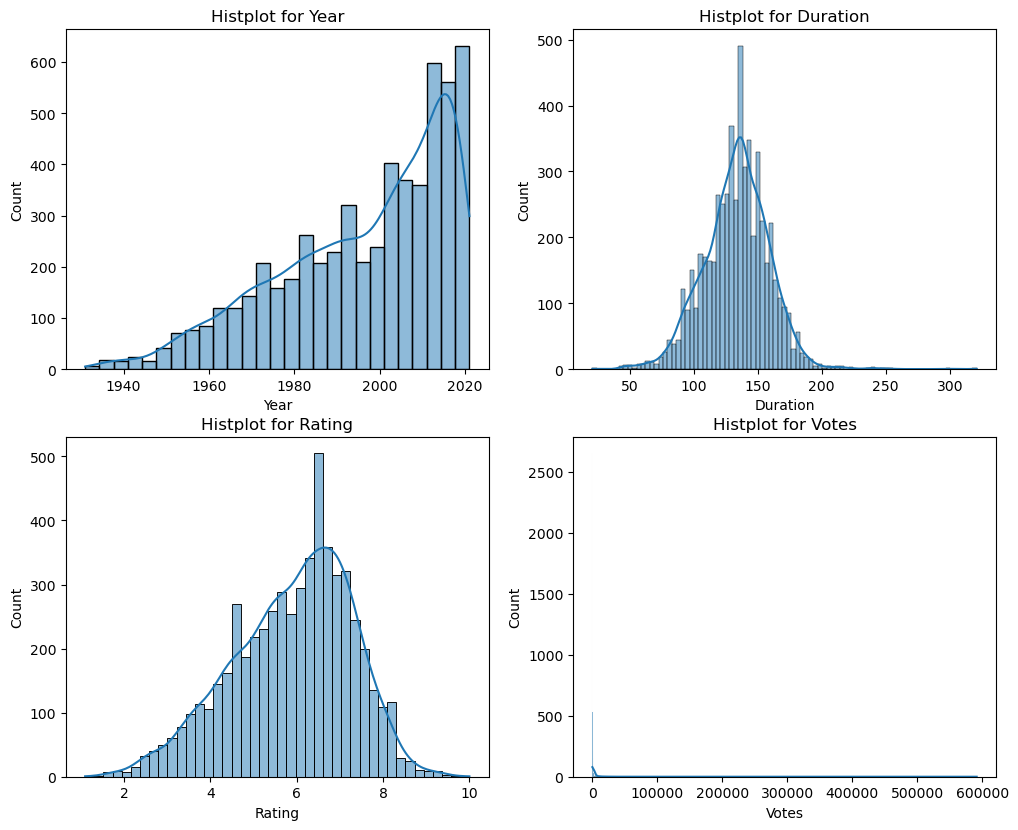

In [185]:
## Numerical Columns :

plt.figure(figsize=(12,15))
for i in range(len(num_cols)):  
    plt.subplot(3,2,i+1)
    sns.histplot(x=df[num_cols[i]], kde=True)
    plt.title(f'Histplot for {num_cols[i]}')
plt.show()

In [186]:
max_votes_row = df[df['Votes'] == df['Votes'].max()]
movie_highest_votes = max_votes_row['Name'].values[0]
print("Movie with the highest votes:", movie_highest_votes)
print('\n', '='*100, '\n')


min_votes_row = df[df['Votes'] == df['Votes'].min()]
movie_lowest_votes = min_votes_row['Name'].values[0]
print("Movie with the lowest votes:", movie_lowest_votes)

Movie with the highest votes: Life of Pi


Movie with the lowest votes: Anmol Sitaare


In [187]:
max_rating_row = df[df['Rating'] == df['Rating'].max()]
movie_highest_rating = max_rating_row['Name'].values[0]
print("Movie with the highest rating:", movie_highest_rating)
print('\n', '='*100, '\n')


min_rating_row = df[df['Rating'] == df['Rating'].min()]
movie_lowest_rating = min_rating_row['Name'].values[0]
print("Movie with the lowest rating:", movie_lowest_rating)

Movie with the highest rating: Love Qubool Hai


Movie with the lowest rating: Sadak 


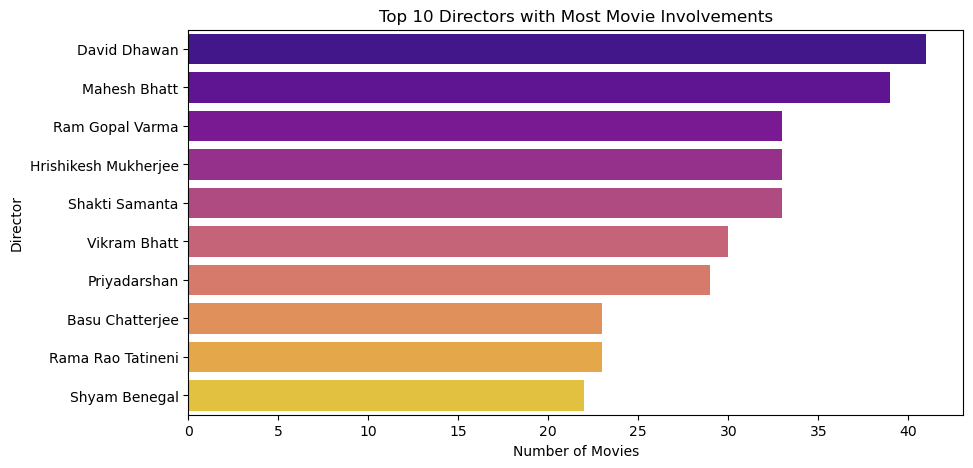

In [188]:
## Top 10 Directors in Industry :

top_10_directors = df['Director'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index,  palette='plasma')
plt.title('Top 10 Directors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

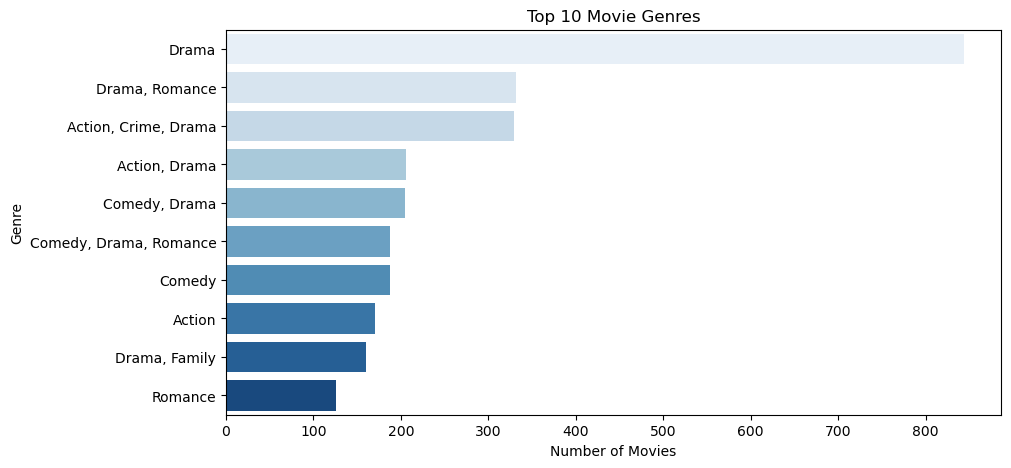

In [189]:
## Top 10 Movie Genre :

top_10_genres = df['Genre'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index,  palette='Blues')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

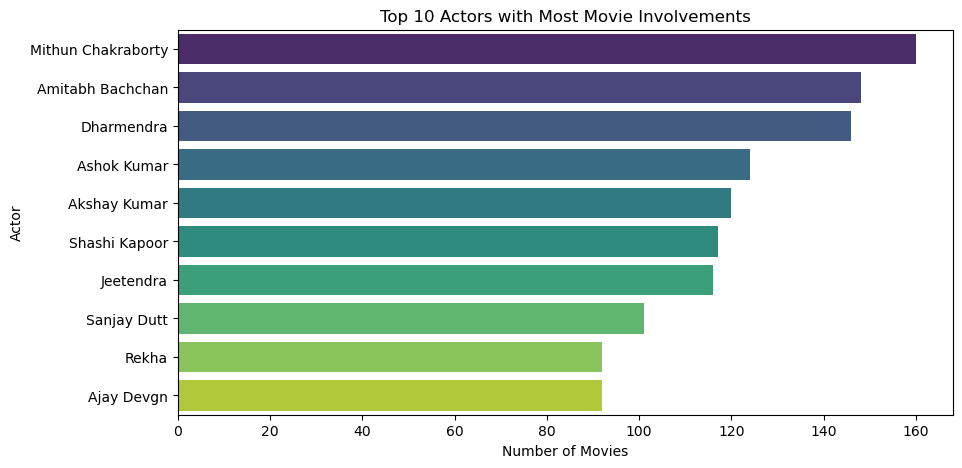

In [190]:
# Top 10 Actors With Most Movie Involvements
combined_actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])

top_10_actors = combined_actors.value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='viridis')
plt.title('Top 10 Actors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

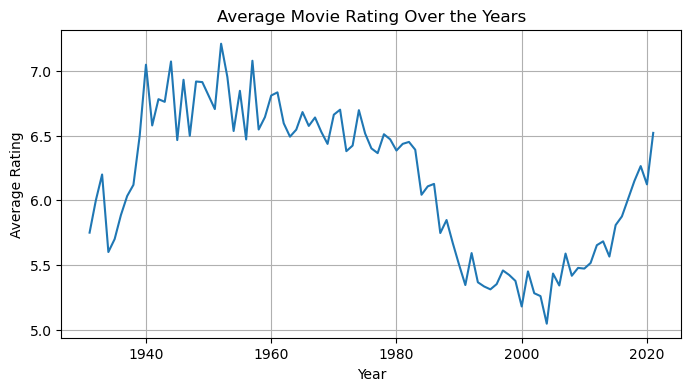

In [191]:
# Calculate the average rating for each year
average_rating_per_year = df.groupby('Year')['Rating'].mean().reset_index()
average_rating_per_year.columns = ['Year', 'Average Rating']

#Plot
plt.figure(figsize=(8, 4))
plt.plot(average_rating_per_year['Year'], average_rating_per_year['Average Rating'], linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating Over the Years')
plt.grid(True)
plt.show()

In [192]:
# Group by Rating and get the count of movies which have higher than rating value 8.5 

high_rating_movies = df[df['Rating'] > 8.5]
rating_counts = high_rating_movies.groupby('Rating')['Name'].count().reset_index()
rating_counts.columns = ['Rating', 'Number of Movies']
rating_counts = rating_counts.sort_values(by='Rating', ascending=False)
rating_counts

,Rating,Number of Movies
10,10.0,1
9,9.7,1
8,9.4,3
7,9.3,7
6,9.2,2
5,9.1,4
4,9.0,5
3,8.9,5
2,8.8,6
1,8.7,8


In [193]:
## CORRELATION ANALYSIS :

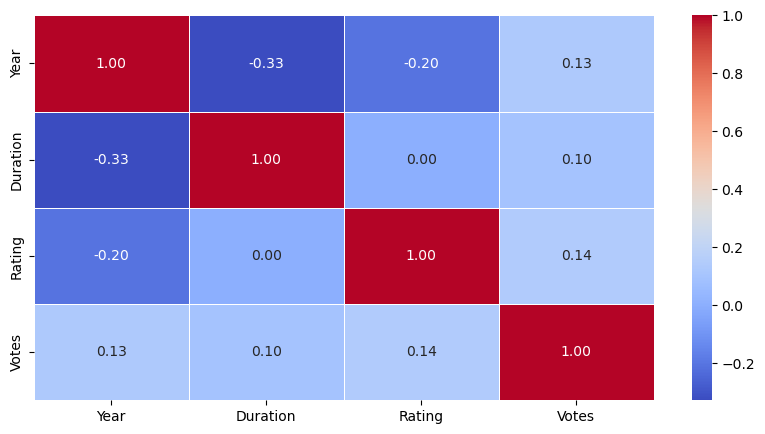

In [194]:
new_df=  df.drop(columns=['Name','Actor 1','Actor 2','Actor 3','Director','Genre'])
corr = new_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)
plt.show()

## FEATURE SELECTION :

In [195]:
# Drop the Name column
df= df.drop('Name',axis=1)

In [196]:
# Create new features :

Genre_Avg_Rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_Average_Rating'] = Genre_Avg_Rating

Director_Avg_Rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_Average_Rating'] = Director_Avg_Rating

Actor1_Avg_Rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_Average_Rating'] = Actor1_Avg_Rating

Actor2_Avg_Rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_Average_Rating'] =Actor2_Avg_Rating

Actor3_Avg_Rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_Average_Rating'] =Actor3_Avg_Rating

## Seperate X and Y :

In [197]:
x= df[['Year','Votes','Duration','Genre_Average_Rating','Director_Average_Rating',
       'Actor1_Average_Rating','Actor2_Average_Rating','Actor3_Average_Rating']]
y=df['Rating']

## Split the Data into TRAIN & TEST :

In [198]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (4527, 8)
y_train (4527,)
x_test (1132, 8)
y_test (1132,)


## Building Linear Regression & Random Forest Models :

In [199]:
## Building 2 machine learning models and training them

lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

## Evaluating the performance of both models :

In [200]:
## Evaluating the model's performance

MSE_lr =  mean_squared_error(y_test, lr_pred) 
MAE_lr = mean_absolute_error(y_test, lr_pred)
R2_Score_lr = r2_score(y_test, lr_pred)
print(' Performance Evaluation for Linear Regression Model: ')
print('Mean squared error value is: ', MSE_lr)
print('Mean absolute error value is: ', MAE_lr)
print('R2 score value is: ', R2_Score_lr)


MSE_rf =  mean_squared_error(y_test, rf_pred) 
MAE_rf = mean_absolute_error(y_test, rf_pred)
R2_Score_rf = r2_score(y_test, rf_pred)
print('\n Performance Evaluation for Random Forest Model: ')
print('Mean squared error value is: ', MSE_rf)
print('Mean absolute error value is: ', MAE_rf)
print('R2 score value is: ', R2_Score_rf)

 Performance Evaluation for Linear Regression Model: 
Mean squared error value is:  0.4456097324878377
Mean absolute error value is:  0.494176907721257
R2 score value is:  0.760375885472396

 Performance Evaluation for Random Forest Model: 
Mean squared error value is:  0.35783759893992934
Mean absolute error value is:  0.40352120141342773
R2 score value is:  0.8075748540949904


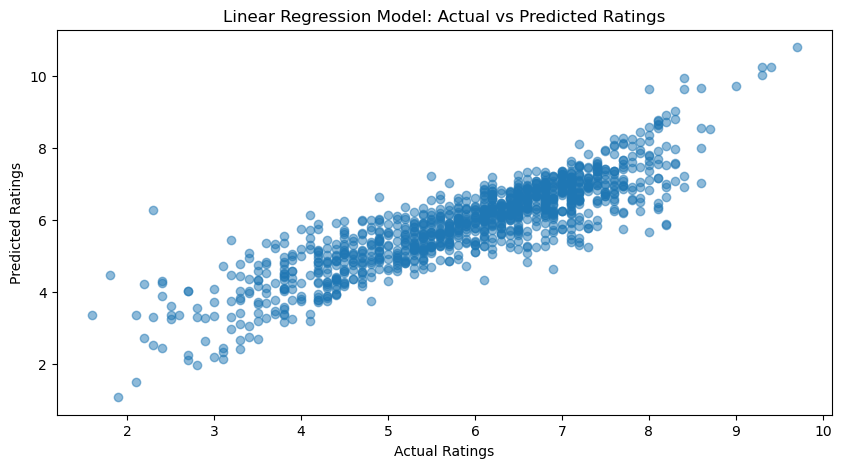

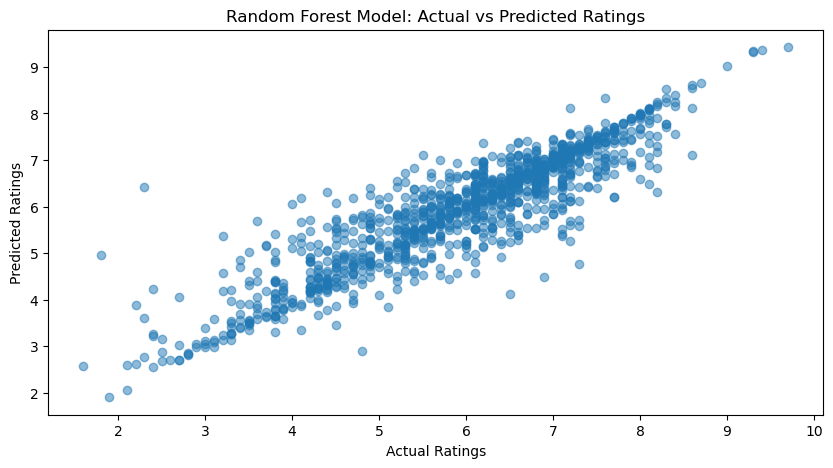

In [201]:
# Scatter plot for Linear Regression model predictions :
plt.figure(figsize=(10, 5))
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.title('Linear Regression Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

# Scatter plot for Random Forest model predictions :
plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.title('Random Forest Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

## MODEL TESTING :

In [202]:
x.head()

,Year,Votes,Duration,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
1,2019,8,109,6.415521,7.000000,6.850000,7.000000,7.000000
3,2019,35,110,5.716822,4.400000,5.420000,4.400000,4.450000
5,1997,827,147,6.242222,5.313333,4.788889,5.786667,5.872727
6,2005,1086,142,6.820000,7.383333,5.435000,6.933333,6.500000
8,2012,326,82,5.477778,5.600000,5.600000,5.883333,5.600000


In [203]:
y.head()

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

In [204]:
# Create new trial dataframe to testing

data = {'Year': [2018], 'Votes': [100] ,'Duration': [130], 'Genre_Average_Rating':[6.0],
        'Director_Average_Rating':[6.5],'Actor1_Average_Rating':[5.5],'Actor2_Average_Rating':[5.8],'Actor3_Average_Rating':[5.3]}
trial_data = pd.DataFrame(data)

In [205]:
# Predict rating using trial data

predict_rating = rf.predict(trial_data)
print('Predicted Rating for trial data: ',predict_rating[0])

Predicted Rating for trial data:  5.862999999999999
